### DeepJiandu paper review
#### 2024-12-31

简牍文字检测识别数据集
https://www.scidb.cn/detail?dataSetId=7f627b99d06e4430a5e5d21b20614b46

    在古代中国，竹简和木简被称为“简牍”，是纸张出现之前记录历史事件的主要媒介。这些文物富含历史数据和文化意义。准确识别简牍上的文字对于解读其中的历史叙事至关重要，并在简牍手稿的处理过程中发挥重要作用。我们介绍了专门为简牍文字检测和识别设计的DeepJiandu数据集。该数据集包含7,416张图像，注释了99,888个字符，涵盖2,272个类别，解决了简牍字符识别中遇到的各种复杂挑战，包括字符退化、多样的布局以及不同的形式和形状。DeepJiandu数据集的真实性和可靠性使其成为训练和评估简牍字符识别模型的有效工具。
    
    由於是彈跳視窗，下載後改檔名解壓縮！
    xml label
    wget https://china.scidb.cn/download?fileId=50aae9748248eff436ef28c8f8abdbbe&traceId=295b90ac-6665-402e-86a1-fef0474eaf00
    bmp image
    wget https://china.scidb.cn/download?fileId=d301e89b7a2d88cb1090ca3310ac1f15&traceId=295b90ac-6665-402e-86a1-fef0474eaf00
    
    

#### name 

* 讀取 Pascal VOC 格式的 XML 標註檔案和相應的 BMP 圖像，並在圖像上繪製標註框和標籤名稱。

XML 
```python
<object>
		<name>&#22240;</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>218</xmin>
			<ymin>54</ymin>
			<xmax>345</xmax>
			<ymax>141</ymax>
		</bndbox>
	</object>
```    

 字碼表
https://www.public.asu.edu/~rjansen/glyph_encoding.html
特殊字元
https://www.rootlaw.com.tw/Attach/L-Doc/B140230001000400-1020305-8000-001.htm 

    &#22240;	因
    &#22232;	囘	&#22233;	囙	&#22234;	囚	&#22235;	四	&#22236;	囜	&#22237;	囝	&#22238;	回	&#22239;	囟
    &#22240;	因	&#22241;	囡	&#22242;	团	&#22243;	団	&#22244;	囤	&#22245;	囥	&#22246;	囦	&#22247;	囧
    &#22248;	囨

* `&#9633;`   =   □
* `注意！這代碼真的是方框，應該是無法辨識時使用！`

２．jpg

cv2需要中文字型？？

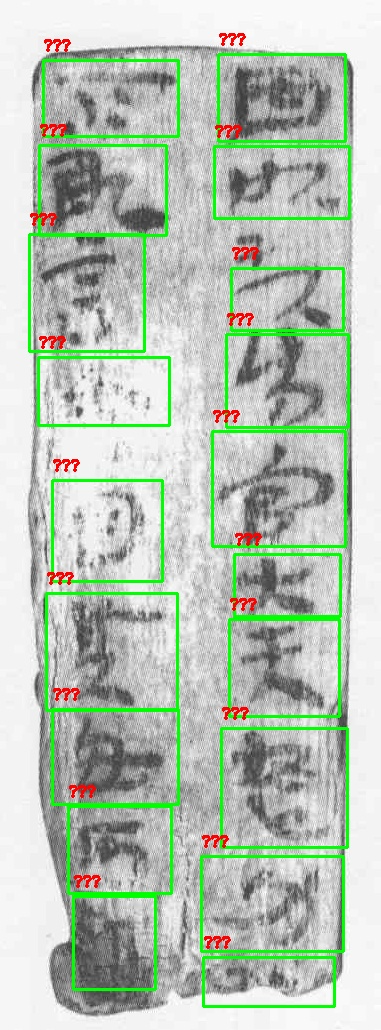

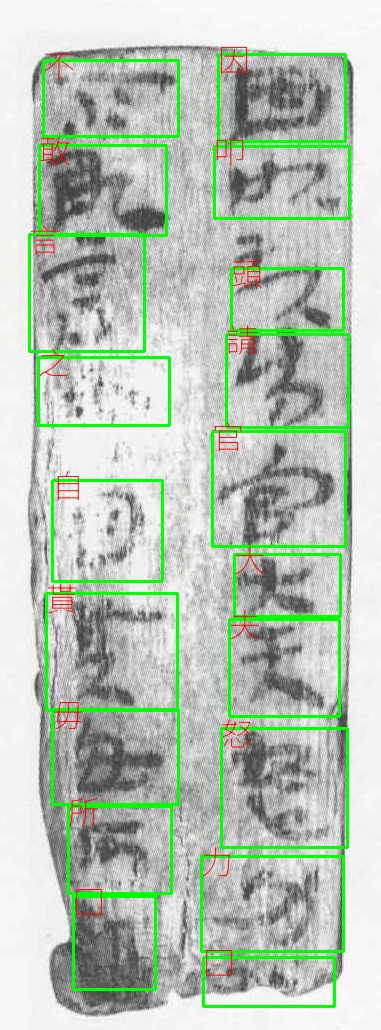

In [7]:
import xml.etree.ElementTree as ET
import cv2
import os
import html
from PIL import ImageFont, ImageDraw, Image
import numpy as np

def draw_boxes_and_labels(image_path, xml_path, output_path, font_path="NotoSansCJK-Regular.ttc"):  # 加入字型路徑參數
    """
    讀取 XML 標註檔案和 BMP 圖像，並在圖像上繪製標註框和標籤名稱 (包含 HTML 實體解碼和中文字型支援)。

    Args:
        image_path: BMP 圖像的路徑。
        xml_path: XML 標註檔案的路徑。
        output_path: 輸出圖像的路徑。
        font_path: 字型檔案的路徑 (預設為 NotoSansCJK-Regular.ttc)。
    """
    try:
        # 讀取圖像
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"找不到圖像檔案：{image_path}")

        # 讀取 XML 檔案
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # 遍歷所有 object 標籤
        for obj in root.findall('object'):
            name_encoded = obj.find('name').text  # 取得編碼後的標籤名稱
            try:
                name = html.unescape(name_encoded) # 解碼 HTML 實體
            except:
                name = name_encoded # 如果解碼失敗，則使用原始字串
            print(name)

            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)

            # 繪製矩形框
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

            # 使用 PIL 繪製中文文字
            font = ImageFont.truetype(font_path, 32) # 設定字型和大小
            img_pil = Image.fromarray(img)
            draw = ImageDraw.Draw(img_pil)
            text_x = xmin
            text_y = ymin - 20 if ymin - 20 > 20 else ymin + 20
            draw.text((text_x, text_y), name, font=font, fill=(0, 0, 255)) # 藍色文字
            img = np.array(img_pil)

        # 儲存結果圖像
        cv2.imwrite(output_path, img)
        print(f"已儲存圖像至：{output_path}")

    except FileNotFoundError as e:
        print(f"錯誤：{e}")
    except ET.ParseError as e:
        print(f"XML 檔案解析錯誤：{e}，檔案路徑：{xml_path}")
    except OSError as e: # 處理字型檔案錯誤
        print(f"字型檔案錯誤：{e}，請確認字型檔案路徑是否正確。")
    except Exception as e:
        print(f"發生未知錯誤：{e}")


if __name__ == "__main__":
    image_dir = "DeepJiandu/val/bmp/"  # 圖像檔案所在的目錄
    xml_dir = "DeepJiandu_labels/val/xml/"  # XML 檔案所在的目錄
    output_dir = "output" # 輸出檔案所在的目錄
    font_file = "NotoSansTC-VariableFont_wght.ttf" # 字型檔案路徑

    # 確保輸出目錄存在
    os.makedirs(output_dir, exist_ok=True)

    # 遍歷目錄中的所有 XML 檔案
    for filename in os.listdir(xml_dir):
        if filename.endswith(".xml"):
            xml_path = os.path.join(xml_dir, filename)
            image_name = os.path.splitext(filename)[0] + ".bmp"
            image_path = os.path.join(image_dir, image_name)
            output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".jpg")

            draw_boxes_and_labels(image_path, xml_path, output_path, font_file) # 傳遞字型路徑


# if __name__ == "__main__":
#     image_dir = "DeepJiandu/val/bmp/"  # 圖像檔案所在的目錄
#     xml_dir = "DeepJiandu_labels/val/xml/"  # XML 檔案所在的目錄
#     output_dir = "output" # 輸出檔案所在的目錄

#     # 確保輸出目錄存在
#     os.makedirs(output_dir, exist_ok=True)

#     # 遍歷目錄中的所有 XML 檔案
#     for filename in os.listdir(xml_dir):
#         if filename.endswith(".xml"):
#             xml_path = os.path.join(xml_dir, filename)
#             image_name = os.path.splitext(filename)[0] + ".bmp" # 假設圖片檔名和 xml 檔名相同，僅副檔名不同
#             image_path = os.path.join(image_dir, image_name)
#             output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + ".jpg") # 輸出成 jpg 格式

#             draw_boxes_and_labels(image_path, xml_path, output_path)

十
一
月
食
一
斛
五
斗
十
已儲存圖像至：output/7083.jpg
甲
渠
士
吏
孫
猛
已儲存圖像至：output/3800.jpg
其
四
人
養
右
解
除
八
人
一
人
作
長
定
作
廿
七
人
伐
茭
千
二
百
一
十
五
束
率
人
伐
卌
已儲存圖像至：output/1565.jpg
書
到
願
令
史
驗
問
收
責
報
敢
言
之
已儲存圖像至：output/3979.jpg
吞
遠
部
五
月
吏
奉
四
千
八
百
候
長
一
人
用
錢
千
二
百
候
史
隧
六
人
用
錢
三
千
六
百
已儲存圖像至：output/3019.jpg
不
服
移
自
證
爰
書
會
月
廿
二
日
如
律
令
即
日
食
時
卒
善
行
已儲存圖像至：output/3906.jpg
功
三
百
六
十
九
人
纍
用
□
已儲存圖像至：output/6193.jpg
亭
行
欲
已儲存圖像至：output/2569.jpg
品
約
殄
北
塞
見
虜
在
塞
外
誤
不
相
及
盡
已儲存圖像至：output/1599.jpg
二
月
辛
巳
自
取
丿
已儲存圖像至：output/6160.jpg
□
元
移
□
受
奉
錢
已儲存圖像至：output/1940.jpg
立
等
逐
捕
到
憲
治
所
不
能
及
驗
問
隧
長
王
長
辤
曰
憲
帶
劍
持
官
弩
一
箭
十
一
枚
大
已儲存圖像至：output/7610.jpg
□
□
將
兵
護
民
田
官
居
延
大
守
府
書
律
令
已儲存圖像至：output/5670.jpg
□
*
壽
昌
奴
滿
家
解
何
對
曰
曰
□
皆
格
死
縣
牒
賦
病
急
劾
二
人
與
已儲存圖像至：output/5808.jpg
誼
不
留
難
敞
變
事
滿
半
日
時
令
史
根
尉
史
彊
守
塞
尉
萬
侯
長
吕
憲
王
充
徐
弘
候
史
成
遂
已儲存圖像至：output/2977.jpg
候
長
充
已儲存圖像至：output/1421.jpg
建
良
兄
存
問
良
叩
已儲存圖像至：output/7164.jpg
用
積
徒
千
一
十
三
人
少
半
人
率
亭
廿
六
人
大
半
人
已儲存圖像至：output/5736.jpg
六
千
一
百
卅


牢
駒
已儲存圖像至：output/282.jpg
屬
普
書
佐
恭
已儲存圖像至：output/5575.jpg
戍
卒
魏
郡
內
黃
平
朢
里
大
夫
田
歸
年
廿
七
已儲存圖像至：output/5502.jpg
箕
山
𨼾
卒
張
詡
今
召
往
十
一
月
食
一
斛
五
斗
□
已儲存圖像至：output/7029.jpg
𢇛
免
言
府
一
事
一
封
四
月
壬
申
令
史
嚴
奏
封
已儲存圖像至：output/3641.jpg
告
何
使
汝
母
索
八
月
奉
吾
非
有
所
負
官
也
即
令
奉
不
可
得
欲
自
言
將
軍
急
使
何
勳
騎
來
欲
賦
已儲存圖像至：output/3681.jpg
毋
傷
隧
長
徐
霸
界
中
二
十
五
里
人
當
行
二
時
五
分
□
已儲存圖像至：output/5582.jpg
三
月
二
十
六
日
出
席
薄
出
臧
中
六
尺
十
枚
凡
六
尺
二
十
枚
出
臧
中
延
十
五
枚
又
新
賣
下
六
尺
三
已儲存圖像至：output/6579.jpg
□
車
十
桼
□
已儲存圖像至：output/1886.jpg
六
石
具
弩
一
稾
矢
五
十
弩
循
一
蘭
冠
各
一
已儲存圖像至：output/3714.jpg
□
子
田
開
疆
公
孫
挾
博
於
已儲存圖像至：output/5615.jpg
第
二
隧
長
史
已儲存圖像至：output/65.jpg
買
𨼾
卒
莊
護
皁
襦
一
領
直
九
百
已儲存圖像至：output/4060.jpg
本
在
宜
穀
辟
災
中
賜
民
時
卒
勮
□
已儲存圖像至：output/3090.jpg
鄣
卒
張
霸
受
閣
帛
一
匹
出
帛
二
丈
三
尺
□
已儲存圖像至：output/7404.jpg
甲
溝
候
官
新
始
建
國
地
皇
上
戊
已儲存圖像至：output/1741.jpg
日
迹
行
廿
三
里
久
視
天
田
中
目
玄
有
亡
人
越
塞
出
入
它
部
界
中
候
長
候
史
直
日
迹
卒
坐
匿
不
言
迹
已儲存圖像至：output/3268.jpg
庫
令
史
一
人
已儲存圖像至：output/3156.jpg
馬
廿
匹
積
七
千
八
□
已儲存圖像至：output

出
三
百
六
十
以
與
外
人
丿
出
四
百
卅
以
與
祁
祁
□
已儲存圖像至：output/4931.jpg
憐
吉
已儲存圖像至：output/2031.jpg
章
叩
頭
言
已儲存圖像至：output/7237.jpg
使
各
當
來
已儲存圖像至：output/1239.jpg
□
枚
八
錢
直
千
二
百
一
十
六
已儲存圖像至：output/6859.jpg
出
時
行
錢
卌
萬
時
粟
君
以
所
得
商
牛
黃
特
齒
八
歲
穀
廿
七
石
予
恩
顧
就
直
後
二
𠄌
三
日
當
發
粟
君
謂
恩
曰
黃
牛
以
當
載
魚
就
直
時
粟
君
借
恩
爲
就
載
魚
五
千
頭
到
觻
得
賈
直
牛
一
頭
穀
廿
七
石
約
爲
粟
君
賣
魚
沽
已儲存圖像至：output/332.jpg
堅
好
善
第
□
已儲存圖像至：output/6234.jpg
三
十
五
已儲存圖像至：output/866.jpg
察
微
𨼾
長
彭
詡
已儲存圖像至：output/1167.jpg
□
百
廿
過
□
已儲存圖像至：output/6274.jpg
十
六
日
己
未
卒
五
人
已儲存圖像至：output/1581.jpg
居
延
丞
奉
穀
月
十
五
石
已儲存圖像至：output/977.jpg
□
千
五
百
五
十
六
其
六
百
六
月
辛
丑
君
以
赋
候
史
□
之
十
一
□
見
六
百
已儲存圖像至：output/3370.jpg
馬
死
去
已儲存圖像至：output/5784.jpg
共
並
取
索
或
反
其
後
視
倉
丞
立
前
死
身
完
毋
兵
刃
木
索
同
加
爲
已儲存圖像至：output/5863.jpg
塞
尉
詡
候
長
普
候
史
已儲存圖像至：output/6721.jpg
十
月
甲
寅
自
取
已儲存圖像至：output/193.jpg
三
月
癸
卯
雞
鳴
時
當
曲
卒
便
受
收
降
卒
友
甲
辰
下
餔
書
一
封
居
延
都
尉
章
詣
大
守
府
時
臨
木
卒
得
付
卅
井
城
敖
北
卒
參
界
中
九
十
八
里
定
行
十
時
中
程
已儲存圖像至：output/7692.jpg
第
二
十
二
隊
長
勝
林
十
月
祿
大
黃
布
十


已儲存圖像至：output/5623.jpg
甲
渠
候
官
已儲存圖像至：output/5584.jpg
乘
卅
井
五
月
豐
自
乘
卅
井
隊
長
李
意
代
豐
乘
甲
渠
已儲存圖像至：output/7485.jpg
相
什
器
已儲存圖像至：output/4732.jpg
右
鄣
卒
五
人
用
粟
十
六
石
已儲存圖像至：output/6107.jpg
出
粟
三
石
三
斗
三
升
少
給
候
之
𨼾
長
王
豊
六
月
食
五
月
壬
辰
卒
橋
霸
取
卩
已儲存圖像至：output/7965.jpg
丁
巳
已儲存圖像至：output/7005.jpg
五
月
當
乘
隧
代
隧
長
郅
嚴
業
*
今
月
休
已儲存圖像至：output/850.jpg
内
戶
封
皆
完
□
已儲存圖像至：output/6627.jpg
士
吏
石
彊
八
月
奉
錢
千
二
百
已儲存圖像至：output/2865.jpg
□
□
南
界
隧
長
已儲存圖像至：output/4766.jpg
六
斗
六
升
大
三
堠
*
長
□
已儲存圖像至：output/5697.jpg
不
侵
隧
長
奉
祀
爲
卿
受
償
千
三
百
五
十
已儲存圖像至：output/3171.jpg
不
中
程
百
里
罰
金
半
兩
過
百
里
至
二
百
里
一
兩
過
二
百
里
二
兩
不
中
程
車
一
里
奪
吏
主
者
勞
各
一
日
二
里
奪
令
相
各
一
日
已儲存圖像至：output/1488.jpg
□
又
米
斗
凡
當
得
四
十
錢
錢
已儲存圖像至：output/4247.jpg
第
廿
六
*
陈
矢
銅
鍭
百
已儲存圖像至：output/5592.jpg
宏
代
隧
長
萬
富
丿
已儲存圖像至：output/132.jpg
三
月
甲
辰
卒
十
四
人
其
一
人
養
定
作
十
三
人
除
沙
三
千
七
百
七
十
石
率
人
除
二
百
九
十
石
已儲存圖像至：output/2899.jpg
臨
桐
隧
䖟
矢
卌
已儲存圖像至：output/2313.jpg
□
忠
服
居
延
平
利
里
不
更
男
同
産
三
人
已儲存圖像至：output/6076.jpg
第
十
桼
隧
卒
鄭
詡
閏
月
已儲存圖像至：out

劍
善
利
下
天
此
絕
而
所
分
三
逢
至
未
堅
白
視
見
不
如
逢
其
已儲存圖像至：output/1622.jpg
七
月
庚
子
日
中
已儲存圖像至：output/2179.jpg
受
七
月
餘
穀
三
百
七
十
石
三
斗
六
升
已儲存圖像至：output/4421.jpg
移
名
籍
常
會
四
時
□
已儲存圖像至：output/3116.jpg
□
□
伯
好
一
斛
二
斗
五
升
三
月
已儲存圖像至：output/6835.jpg
侍
祠
者
齋
戒
務
以
謹
敬
鮮
絜
約
省
爲
故
裦
尚
考
察
不
以
爲
意
者
輙
言
如
律
令
已儲存圖像至：output/246.jpg
獨
已儲存圖像至：output/1768.jpg
掾
譚
已儲存圖像至：output/357.jpg
癸
丑
下
餔
入
已儲存圖像至：output/7319.jpg
故
尉
李
□
已儲存圖像至：output/6802.jpg
言
何
罪
耐
司
□
渠
候
官
戍
卒
□
已儲存圖像至：output/7359.jpg
進
記
中
卿
甲
渠
塞
候
候
明
伏
地
再
拜
已儲存圖像至：output/4941.jpg
駒
故
已儲存圖像至：output/717.jpg
掾
已儲存圖像至：output/6730.jpg
□
侯
長
政
以
來
已儲存圖像至：output/2219.jpg
石
五
斗
今
餘
十
石
五
斗
已儲存圖像至：output/7326.jpg
真
自
言
當
得
官
稟
閔
□
麥
兒
子
書
木
宜
田
穀
五
千
二
百
已儲存圖像至：output/7287.jpg
第
十
二
隊
卒
李
戎
丿
已儲存圖像至：output/1663.jpg
出
茭
四
百
束
以
已儲存圖像至：output/4008.jpg
言
會
月
廿
二
日
謹
已儲存圖像至：output/5018.jpg
期
會
急
行
毋
留
遲
已儲存圖像至：output/7254.jpg
言
之
已儲存圖像至：output/1177.jpg
胡
隧
卒
累
山
里
業
良
已儲存圖像至：output/7294.jpg
甲
渠
候
官
行
者
走
已儲存圖像至：output/4088.jpg
萬
五
千
關
內
侯
以
下
至
宗
室
及
列